# Task 01 - Data Science Internship Assignment

In [91]:
#Import Libraries
import pandas as pd
import numpy as np
import re



In [92]:
#Load Datasets
supermarket_df = pd.read_csv('/content/supermarkets.csv')
sales_df = pd.read_csv('/content/sales.csv')
item_df = pd.read_csv('/content/item.csv')
promotion_df = pd.read_csv('/content/promotion.csv')

In [93]:
item_df.head()
item_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 927 entries, 0 to 926
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   code        927 non-null    int64 
 1   descrption  927 non-null    object
 2   type        927 non-null    object
 3   brand       927 non-null    object
 4   size        927 non-null    object
dtypes: int64(1), object(4)
memory usage: 36.3+ KB


In [94]:
promotion_df.head()
promotion_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351372 entries, 0 to 351371
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   code          351372 non-null  int64 
 1   supermarkets  351372 non-null  int64 
 2   week          351372 non-null  int64 
 3   feature       351372 non-null  object
 4   display       351372 non-null  object
 5   province      351372 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 16.1+ MB


In [6]:
sales_df.head()
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 11 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   code         1048575 non-null  int64  
 1   amount       1048575 non-null  float64
 2   units        1048575 non-null  int64  
 3   time         1048575 non-null  int64  
 4   province     1048575 non-null  int64  
 5   week         1048575 non-null  int64  
 6   customerId   1048575 non-null  int64  
 7   supermarket  1048575 non-null  int64  
 8   basket       1048575 non-null  int64  
 9   day          1048575 non-null  int64  
 10  voucher      1048575 non-null  int64  
dtypes: float64(1), int64(10)
memory usage: 88.0 MB


# Clean the 4 Datasets

**Supermarkets Dataset**

In [95]:
# Sort the supermarket dataset by 'supermarket_No' column in ascending order
supermarket_df1 = supermarket_df.sort_values(by='supermarket_No', ascending=True)
supermarket_df1.head()
supermarket_df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 387 entries, 21 to 386
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   supermarket_No  387 non-null    int64
 1   postal-code     387 non-null    int64
dtypes: int64(2)
memory usage: 9.1 KB


In [96]:
# Reset the index after sorting
supermarket_df1.reset_index(drop=True, inplace=True)

# Save the sorted dataset
supermarket_df1.to_csv('supermarket_data.csv', index=False)

In [6]:
supermarket_df1.tail()

,supermarket_No,postal-code
382,383,40502
383,384,42367
384,385,37160
385,386,29803
386,387,37748


**Item Dataset**

Special Functions for item Dataset


In [97]:
# Function to clean the size column
def clean_size(size):
    try:
        # Convert to uppercase and strip leading/trailing spaces
        size = str(size).upper().strip()

        # Convert 'OUNCE' to 'OZ'
        size = size.replace('OUNCE', 'OZ')

        # Remove 'FL' and any unwanted text between numbers and 'OZ'
        size = re.sub(r'FL\s*OZ', 'OZ', size)

        # Remove unwanted characters, keeping only numbers and the last 'OZ' or 'LB'
        size = re.sub(r'[^0-9\s/.OZLB]', '', size).strip()

        # Handle fractions like '6 1/2 OZ' -> '6.5 OZ'
        fraction_match = re.search(r'(\d+)\s+(\d+)\/(\d+)', size)
        if fraction_match:
            whole_part = int(fraction_match.group(1))
            numerator = int(fraction_match.group(2))
            denominator = int(fraction_match.group(3))
            fractional_part = numerator / denominator
            size = str(whole_part + fractional_part) + ' OZ'

        # Handle mixed measurements like '6LB 11OZ'
        if 'LB' in size and 'OZ' in size:
            lb_value = re.search(r'(\d+)\s*LB', size)
            oz_value = re.search(r'(\d+)\s*OZ', size)
            total_oz = 0
            if lb_value:
                total_oz += float(lb_value.group(1)) * 16  # Convert LB to OZ
            if oz_value:
                total_oz += float(oz_value.group(1))  # Add OZ value
            return total_oz

        # Handle 'OZ' values
        elif 'OZ' in size:
            size_value = re.search(r'(\d+\.?\d*)\s*OZ', size)
            if size_value:
                return float(size_value.group(1))

        # Handle 'LB' values
        elif 'LB' in size:
            size_value = re.search(r'(\d+\.?\d*)\s*LB', size)
            if size_value:
                return float(size_value.group(1)) * 16  # Convert LB to OZ

        return np.nan

    except Exception as e:
        print(f"Error processing size: {size} | Error: {e}")
        return np.nan


Utilizing functions in Item Dataframe

In [98]:
# Copy of the item Dataset
item_df1 = item_df.copy()

In [99]:
# Apply the cleaning function to the 'size' column
item_df1['cleaned_size'] = item_df1['size'].apply(clean_size)

In [11]:
item_df1.head(20)
item_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 927 entries, 0 to 926
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   code          927 non-null    int64  
 1   descrption    927 non-null    object 
 2   type          927 non-null    object 
 3   brand         927 non-null    object 
 4   size          927 non-null    object 
 5   cleaned_size  890 non-null    float64
dtypes: float64(1), int64(1), object(4)
memory usage: 43.6+ KB


In [100]:
def filter_null_cleaned_size(df):

    # Using Boolean Indexing
    null_mask = df['cleaned_size'].isnull()
    null_df = df[null_mask]

    return null_df

item_df2 = item_df1.copy()

filtered_item_df = filter_null_cleaned_size(item_df2)
print(filtered_item_df)

           code                      descrption    type          brand  \
19   1800028064       H J PANCK BTRMLK COMP MIX  Type 1    Hungry Jack   
21   1800028066        H J BUTTERMILK PANCK MIX  Type 1    Hungry Jack   
22   1800028067       H J PANCK MX EX LITE COMP  Type 1    Hungry Jack   
29   4163100055          LUND SWEDE PANCAKE MIX  Type 1     Lund Swede   
63   7075304162        ANTOINES CAVATAPPI 12 OZ  Type 2      Antoine's   
91   7680851708       BARILLA JUMBO SHELS 12 OZ  Type 2        Barilla   
137  1510000031          CREAMETTE LASAGNA MACR  Type 2      Creamette   
161  7067000721          DA VINCI LASAGNA 16 OZ  Type 2        DaVinci   
194  2409407009       DECECCO CAPELLINI    16OZ  Type 2        Dececco   
195  2409407011       DECECCO SPAGHETTINI  16OZ  Type 2        Dececco   
196  2409407012       DECECCO SPAGHETTI    16OZ  Type 2        Dececco   
198  2409407034       DECECCO FUSILLI      16OZ  Type 2        Dececco   
199  2409407040       DECECCO PENNE RE

In [74]:
filtered_item_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37 entries, 19 to 925
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   code          37 non-null     int64  
 1   descrption    37 non-null     object 
 2   type          37 non-null     object 
 3   brand         37 non-null     object 
 4   size          37 non-null     object 
 5   cleaned_size  0 non-null      float64
dtypes: float64(1), int64(1), object(4)
memory usage: 2.0+ KB


In [101]:
def remove_keywords(description, keywords):
    for keyword in keywords:
        description = re.sub(keyword, '', description, flags=re.IGNORECASE)
    return description

# Remove keywords 'Type 3' and 'Type 2' from the 'descrption' column
keywords_to_remove = ['Type 3', 'Type 2', 'Type 1', 'Type 4']

item_df2['descrption'] = item_df2['descrption'].apply(lambda x: remove_keywords(x, keywords_to_remove))

# Function to extract the integer from the description
def extract_int_from_description(description):
    match = re.search(r'\d+', description)
    if match:
        return int(match.group())
    else:
        return None

# Apply the function to the 'descrption' column and create a new column 'extracted_size'
item_df2['extracted_size'] = item_df2['descrption'].apply(extract_int_from_description)

# Fill null values in 'cleaned_size' with the extracted values
item_df2['cleaned_size'] = item_df2['cleaned_size'].fillna(item_df2['extracted_size'])

# Convert 'cleaned_size' to float
item_df2['cleaned_size'] = item_df2['cleaned_size'].astype(float)

In [102]:
print(item_df2.iloc[91])

code                             7680851708
descrption        BARILLA JUMBO SHELS 12 OZ
type                                 Type 2
brand                               Barilla
size                             CUST REQST
cleaned_size                           12.0
extracted_size                         12.0
Name: 91, dtype: object


In [103]:
# Drop the 'extracted_size' column
item_df2.drop(columns=['extracted_size'], inplace=True)
print(item_df2)

           code                      descrption    type         brand  \
0    3000005040   AUNT JEM ORIGINAL PANCAKE MIX  Type 1   Aunt Jemima   
1    3000005070       A/JEM COMPLETE PANCAKE MI  Type 1   Aunt Jemima   
2    3000005300       AJ BUTTERMILK PANCAKE MIX  Type 1   Aunt Jemima   
3    3000005350        A J BTRMLK COMP PNCK MIX  Type 1   Aunt Jemima   
4    1600015760       BC PANCAKE MIX BUTTERMILK  Type 1      Bisquick   
..          ...                             ...     ...           ...   
922  3905955112       SPRNG TREE SF MAPLE SYRUP  Type 4   Spring Tree   
923  3905972884         SPRING TREE MAPLE SYRUP  Type 4   Spring Tree   
924  3068434050  TREE OF LIFE REGULAR BLACKSTRA  Type 4  Tree of Life   
925  3068434052  TREE OF LIFE REGULAR BLACKSTRA  Type 4  Tree of Life   
926  6138914020          VRMT GLD PURE MPL SYRP  Type 4  Vermont Gold   

           size  cleaned_size  
0          2 LB         32.00  
1      32    OZ         32.00  
2         32 OZ         32.

In [104]:
# Calculate the average of non-null values
average_cleaned_size = item_df2['cleaned_size'].mean()

item_df3 = item_df2.copy()

# Fill null values with the average
item_df3['cleaned_size'] = item_df3['cleaned_size'].fillna(average_cleaned_size)

In [105]:
# Group by 'brand' and calculate the average 'cleaned_size' for each brand
brand_averages = item_df2.groupby('brand')['cleaned_size'].mean()

# Fill missing averages with the overall average
overall_average = item_df2['cleaned_size'].mean()
brand_averages = brand_averages.fillna(overall_average)

# Create a mapping of brand to average cleaned size
average_map = brand_averages.to_dict()

# Copy of the item_df2 as item_df4
item_df4 = item_df2.copy()

# Fill null values in 'cleaned_size' with the corresponding brand average
item_df4['cleaned_size'] = item_df2['cleaned_size'].fillna(item_df2['brand'].map(average_map))

In [106]:
#D rop the 'size' column
item_df4.drop(columns=['size'], inplace=True)

In [107]:
# Rename columns
item_df4.rename(columns={'descrption': 'description', 'cleaned_size': 'cleaned_size_in_OZ'}, inplace=True)

In [108]:
item_df4.info()
item_df4.head()
print(item_df4.iloc[925])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 927 entries, 0 to 926
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   code                927 non-null    int64  
 1   description         927 non-null    object 
 2   type                927 non-null    object 
 3   brand               927 non-null    object 
 4   cleaned_size_in_OZ  927 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 36.3+ KB
code                                      3068434052
description           TREE OF LIFE REGULAR BLACKSTRA
type                                          Type 4
brand                                   Tree of Life
cleaned_size_in_OZ                         19.219243
Name: 925, dtype: object


In [109]:
# Save the cleaned dataset
item_df3.to_csv('item_data.csv', index=False)

In [110]:
# Save the cleaned dataset
item_df4.to_csv('item_data_new.csv', index=False)

**Promotion Dataset**

In [111]:
# Rename the 'supermarkets' column to 'supermarket_No'
promotion_df.rename(columns={'supermarkets': 'supermarket_No'}, inplace=True)

print(promotion_df)

promotion_df.to_csv('promotion_data.csv', index=False)

              code  supermarket_No  week                feature  \
0       2700042240             285    91         Not on Feature   
1       2700042292             285    92  Interior Page Feature   
2       2700042274             285    92  Interior Page Feature   
3       2700042273             285    92  Interior Page Feature   
4       2700042254             285    92  Interior Page Feature   
...            ...             ...   ...                    ...   
351367  9999966721             387   101     Wrap Front Feature   
351368  9999966720             387   101     Wrap Front Feature   
351369  3620000507             387   104  Interior Page Feature   
351370  3620000493             387   104  Interior Page Feature   
351371  9999966715             387   101     Wrap Front Feature   

                  display  province  
0       Mid-Aisle End Cap         2  
1          Not on Display         2  
2          Not on Display         2  
3          Not on Display         2  
4    

**Sales Dataset**

In [112]:
# Rename the 'supermarket' column to 'supermarket_No'
sales_df.rename(columns={'supermarket': 'supermarket_No'}, inplace=True)

# Ensure the 'time' column is a string
sales_df['time'] = sales_df['time'].astype(str)

# Pad the values with leading zeros to ensure they are four digits
sales_df['time'] = sales_df['time'].str.zfill(4)

# Convert the 'time' column to time format (HH:MM)
sales_df['time'] = pd.to_datetime(sales_df['time'], format='%H%M').dt.time

# Convert negative values in the 'amount' column to positive values
sales_df['amount'] = sales_df['amount'].abs()

# Display the updated DataFrame
print(sales_df.head())

# Save the updated DataFrame to CSV
sales_df.to_csv('sales_data.csv', index=False)

# Download the CSV file
from google.colab import files
files.download('sales_data.csv')


         code  amount  units      time  province  week  customerId  \
0  7680850106    0.80      1  11:00:00         2     1      125434   
1  3620000470    3.59      1  11:00:00         2     1      125434   
2  1800028064    2.25      1  11:37:00         2     1      108320   
3  9999985067    0.85      1  11:48:00         2     1      162016   
4  9999985131    2.19      1  13:23:00         2     1       89437   

   supermarket_No  basket  day  voucher  
0             244       1    1        0  
1             244       1    1        0  
2             244       2    1        0  
3             244       3    1        0  
4             244       4    1        0  


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [113]:
sales_data_df  = pd.read_csv('/content/sales_data.csv')
sales_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   code            1048575 non-null  int64  
 1   amount          1048575 non-null  float64
 2   units           1048575 non-null  int64  
 3   time            1048575 non-null  object 
 4   province        1048575 non-null  int64  
 5   week            1048575 non-null  int64  
 6   customerId      1048575 non-null  int64  
 7   supermarket_No  1048575 non-null  int64  
 8   basket          1048575 non-null  int64  
 9   day             1048575 non-null  int64  
 10  voucher         1048575 non-null  int64  
dtypes: float64(1), int64(9), object(1)
memory usage: 88.0+ MB


# Normalization

**supermarket dataset is already normalized.**



**Item Dataset**

In [114]:
item_df_cleaned=item_df4

In [115]:
# Extract unique types and brands
df_type = pd.DataFrame(item_df_cleaned['type'].unique(), columns=['type'])
df_type['type_id'] = df_type.index + 1  # Assign unique type_id starting from 1

df_brand = pd.DataFrame(item_df_cleaned['brand'].unique(), columns=['brand'])
df_brand['brand_id'] = df_brand.index + 1  # Assign unique brand_id starting from 1

# Merge back to assign type_id and brand_id in item_df_cleaned
item_df_cleaned = item_df_cleaned.merge(df_type, on='type', how='left')
item_df_cleaned= item_df_cleaned.merge(df_brand, on='brand', how='left')

# Debugging: Check the columns of item_df_cleaned
print("Current columns in item_df_cleaned:\n", item_df_cleaned.columns)

# Keep only normalized columns
try:
    item_df_normalized = item_df_cleaned[['code', 'description', 'type_id', 'brand_id', 'cleaned_size_in_OZ']]
except KeyError as e:
    print(f"Error: {e}")
    print("Available columns are:", item_df_cleaned.columns.tolist())

# Save normalized item DataFrame
item_df_normalized.to_csv('normalized_item.csv', index=False)

# Save the unique types and brands to separate CSV files
df_type.to_csv('item_types.csv', index=False)
df_brand.to_csv('item_brands.csv', index=False)

print(item_df_normalized.head())

Current columns in item_df_cleaned:
 Index(['code', 'description', 'type', 'brand', 'cleaned_size_in_OZ', 'type_id',
       'brand_id'],
      dtype='object')
         code                    description  type_id  brand_id  \
0  3000005040  AUNT JEM ORIGINAL PANCAKE MIX        1         1   
1  3000005070      A/JEM COMPLETE PANCAKE MI        1         1   
2  3000005300      AJ BUTTERMILK PANCAKE MIX        1         1   
3  3000005350       A J BTRMLK COMP PNCK MIX        1         1   
4  1600015760      BC PANCAKE MIX BUTTERMILK        1         2   

   cleaned_size_in_OZ  
0               32.00  
1               32.00  
2               32.00  
3               16.00  
4                6.75  


In [116]:
normalized_item_df = pd.read_csv('/content/normalized_item.csv')
df_type = pd.read_csv('/content/item_types.csv')
df_brand = pd.read_csv('/content/item_brands.csv')

**Promotion Dataset**

In [117]:
# Extract unique features and displays
df_feature = pd.DataFrame(promotion_df['feature'].unique(), columns=['feature'])
df_feature['feature_id'] = df_feature.index + 1

df_display = pd.DataFrame(promotion_df['display'].unique(), columns=['display'])
df_display['display_id'] = df_display.index + 1

# Merge back to assign feature_id and display_id in promotion_df
promotion_df = promotion_df.merge(df_feature, on='feature')
promotion_df = promotion_df.merge(df_display, on='display')

# Keep only normalized columns
promotion_df_normalized = promotion_df[['code', 'supermarket_No', 'week', 'feature_id', 'display_id', 'province']]

# Save normalized promotion DataFrame
promotion_df_normalized.to_csv('normalized_promotion.csv', index=False)
df_feature.to_csv('promotion_features.csv', index=False)
df_display.to_csv('promotion_displays.csv', index=False)

print(promotion_df_normalized.columns)

Index(['code', 'supermarket_No', 'week', 'feature_id', 'display_id',
       'province'],
      dtype='object')


In [118]:
df_feature = pd.read_csv('/content/promotion_features.csv')
df_display = pd.read_csv('/content/promotion_displays.csv')

In [119]:
print(supermarket_df1.head())
print(item_df_normalized.head())
print(df_brand.head())
print(df_type.head())
print(promotion_df_normalized.head())
print(df_feature.head())
print(df_display.head())
print(sales_df.head())

   supermarket_No  postal-code
0               1        37865
1               2        30084
2               3        30039
3               4        31210
4               5        30044
         code                    description  type_id  brand_id  \
0  3000005040  AUNT JEM ORIGINAL PANCAKE MIX        1         1   
1  3000005070      A/JEM COMPLETE PANCAKE MI        1         1   
2  3000005300      AJ BUTTERMILK PANCAKE MIX        1         1   
3  3000005350       A J BTRMLK COMP PNCK MIX        1         1   
4  1600015760      BC PANCAKE MIX BUTTERMILK        1         2   

   cleaned_size_in_OZ  
0               32.00  
1               32.00  
2               32.00  
3               16.00  
4                6.75  
         brand  brand_id
0  Aunt Jemima         1
1     Bisquick         2
2      Bruce's         3
3    Classique         4
4    Fastshake         5
     type  type_id
0  Type 1        1
1  Type 2        2
2  Type 3        3
3  Type 4        4
         code  superma

# Business Solution 01

##  Analyze the effectiveness of promotions on items

In [120]:
from datetime import timedelta

# Load datasets
sales_df = pd.read_csv('/content/sales_data.csv')
promotion_df_normalized = pd.read_csv('/content/normalized_promotion.csv')
item_df_normalized = pd.read_csv('/content/normalized_item.csv')
df_type = pd.read_csv('/content/item_types.csv')
df_brand = pd.read_csv('/content/item_brands.csv')

# Calculate total weekly sales for weeks 1 to 28
sales_df['total_sales'] = sales_df['amount']
weekly_sales = sales_df.groupby(['code', 'week'])['total_sales'].sum().reset_index()

# Convert week numbers to actual dates (Assume week 1 starts on '2022-01-01')
start_date = pd.to_datetime('2022-01-01')
weekly_sales['date'] = start_date + pd.to_timedelta(weekly_sales['week'] * 7, unit='D')

# Save the result to CSV for review
weekly_sales.to_csv('weekly_sales.csv', index=False)
print(weekly_sales)


             code  week  total_sales       date
0       111112360    13         5.59 2022-04-02
1       111112360    23         4.99 2022-06-11
2       111112360    25         5.99 2022-06-25
3       111112360    26         5.99 2022-07-02
4       111112360    27        46.32 2022-07-09
...           ...   ...          ...        ...
14164  9999985766    24        62.66 2022-06-18
14165  9999985766    25        48.90 2022-06-25
14166  9999985766    26        65.61 2022-07-02
14167  9999985766    27        62.11 2022-07-09
14168  9999985766    28        19.90 2022-07-16

[14169 rows x 4 columns]


In [121]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Time Series Forecasting for each item from week 29-104
forecast_results = {}

for item_code in weekly_sales['code'].unique():
    item_sales = weekly_sales[weekly_sales['code'] == item_code]
    item_sales.set_index('week', inplace=True)  # Optionally, can set 'date' instead for better interpretability

    # Fit SARIMA model (experiment with model if needed)
    model = SARIMAX(item_sales['total_sales'], order=(1,1,1), seasonal_order=(1,1,1,52))
    model_fit = model.fit(disp=False)

    # Forecast for weeks 29 to 104
    forecast = model_fit.predict(start=29, end=104)

    # Save forecasted sales, round to two decimal points
    forecast_results[item_code] = forecast.round(2)



Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In th

In [122]:
print(forecast_results)

{111112360: 29      5.79
30      5.79
31      5.79
32      5.79
33      5.79
       ...  
100     8.79
101     8.79
102     8.79
103     8.79
104    11.58
Name: predicted_mean, Length: 76, dtype: float64, 566300023: 29     3.39
30     3.39
31     3.39
32     3.39
33     3.39
       ... 
100    2.55
101    2.55
102    2.55
103    2.55
104    6.78
Name: predicted_mean, Length: 76, dtype: float64, 566300028: 29     30.69
30     30.69
31     30.69
32     30.69
33     30.69
       ...  
100    41.85
101    41.85
102    41.85
103    41.85
104    61.38
Name: predicted_mean, Length: 76, dtype: float64, 566300029: 29     1.49
30     1.49
31     1.49
32     1.49
33     1.49
       ... 
100    2.24
101    2.24
102    2.24
103    2.24
104    2.98
Name: predicted_mean, Length: 76, dtype: float64, 566300035: 29     2.19
30     2.19
31     2.19
32     2.19
33     2.19
       ... 
100    3.29
101    3.29
102    3.29
103    3.29
104    4.38
Name: predicted_mean, Length: 76, dtype: float64, 601011292: 2

In [123]:
from datetime import timedelta

# Convert week numbers to actual dates
promotion_df_normalized['promo_date'] = start_date + pd.to_timedelta(promotion_df_normalized['week'] * 7, unit='D')


In [124]:
# Filter for weeks before the promotion (1-28)
pre_promo_sales = weekly_sales[weekly_sales['week'] <= 28].groupby('code')['total_sales'].sum().reset_index()
pre_promo_sales.columns = ['code', 'pre_promo_sales']


In [125]:
print(pre_promo_sales)

           code  pre_promo_sales
0     111112360            74.67
1     566300023           103.39
2     566300028          1023.93
3     566300029             1.49
4     566300035            17.52
..          ...              ...
777  9999985217           541.59
778  9999985260          4871.07
779  9999985261          7901.14
780  9999985488          1231.69
781  9999985766          1822.00

[782 rows x 2 columns]


In [126]:
# Initialize an empty list to store forecasted sales for each item
post_promo_sales = []

for item_code, forecast in forecast_results.items():
    # Sum the forecasted sales from week 29 to 104
    total_forecasted_sales = forecast[29:].sum()

    # Append the result as a tuple (item_code, total_forecasted_sales)
    post_promo_sales.append((item_code, total_forecasted_sales))

# Convert the result into a DataFrame
post_promo_sales_df = pd.DataFrame(post_promo_sales, columns=['code', 'post_promo_sales'])

In [127]:
print(post_promo_sales_df)

           code  post_promo_sales
0     111112360            415.92
1     566300023            134.25
2     566300028           2237.58
3     566300029            106.02
4     566300035            155.72
..          ...               ...
777  9999985217           1888.41
778  9999985260           4923.84
779  9999985261           9865.92
780  9999985488           1136.06
781  9999985766            -63.46

[782 rows x 2 columns]


In [128]:
# Merge pre-promotion sales and forecasted post-promotion sales
sales_comparison = pd.merge(pre_promo_sales, post_promo_sales_df, on='code', how='inner')

# Calculate the percentage change in sales after promotion
sales_comparison['percentage_change'] = ((sales_comparison['post_promo_sales'] - sales_comparison['pre_promo_sales']) /
                                         sales_comparison['pre_promo_sales']) * 100

In [129]:
promotion_weeks = pd.read_csv('/content/promotion_data.csv')

# Merge with promotion data to include only promoted items
promo_sales_comparison = pd.merge(sales_comparison, promotion_weeks, on='code', how='left')
promo_sales_comparison = promo_sales_comparison.dropna(subset=['week'])  # Remove items with no promotions




Plot pre-promotion vs post-promotion sales for each item

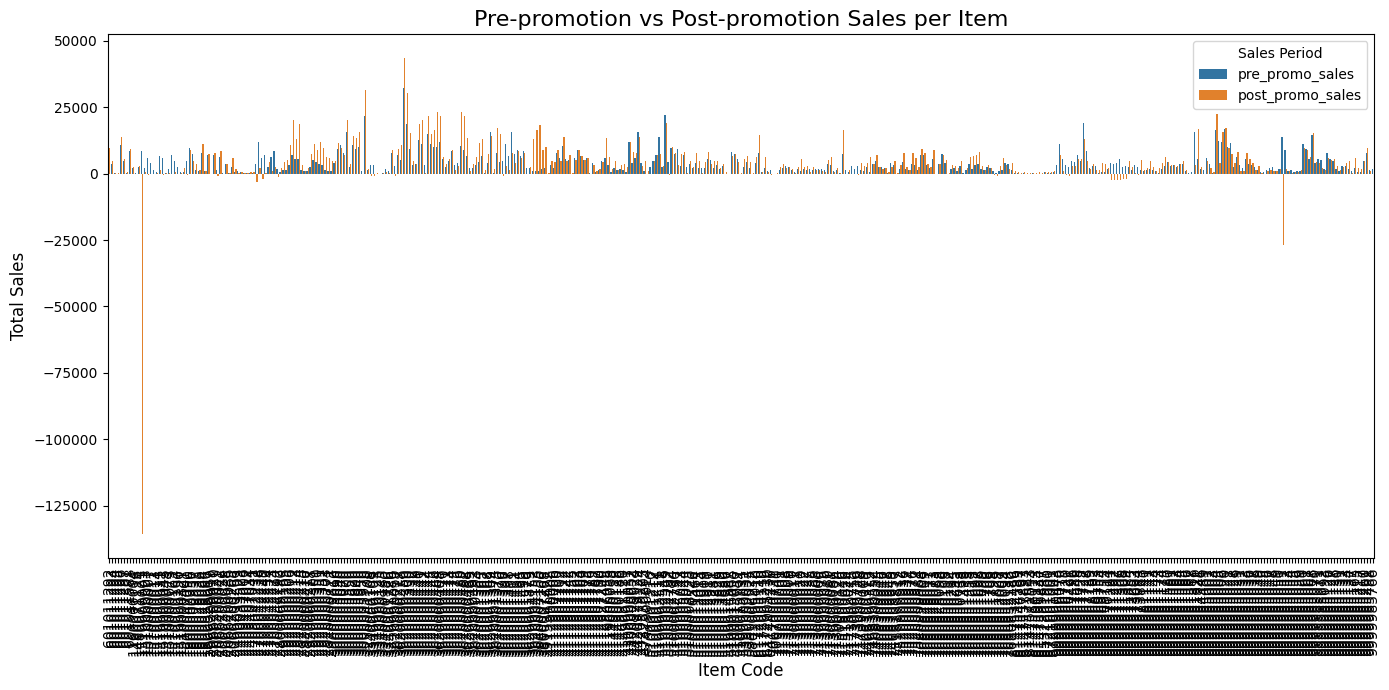

In [130]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size for better readability
plt.figure(figsize=(14, 7))

sns.barplot(data=promo_sales_comparison.melt(id_vars=['code'],
                                             value_vars=['pre_promo_sales', 'post_promo_sales']),
            x='code', y='value', hue='variable')

plt.title('Pre-promotion vs Post-promotion Sales per Item', fontsize=16)
plt.xlabel('Item Code', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=90)
plt.legend(title='Sales Period', loc='upper right')

# Show plot
plt.tight_layout()
plt.show()


Plot the percentage change

<ipython-input-131-ff487bae661a>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=promo_sales_comparison, x='code', y='percentage_change', palette='coolwarm')


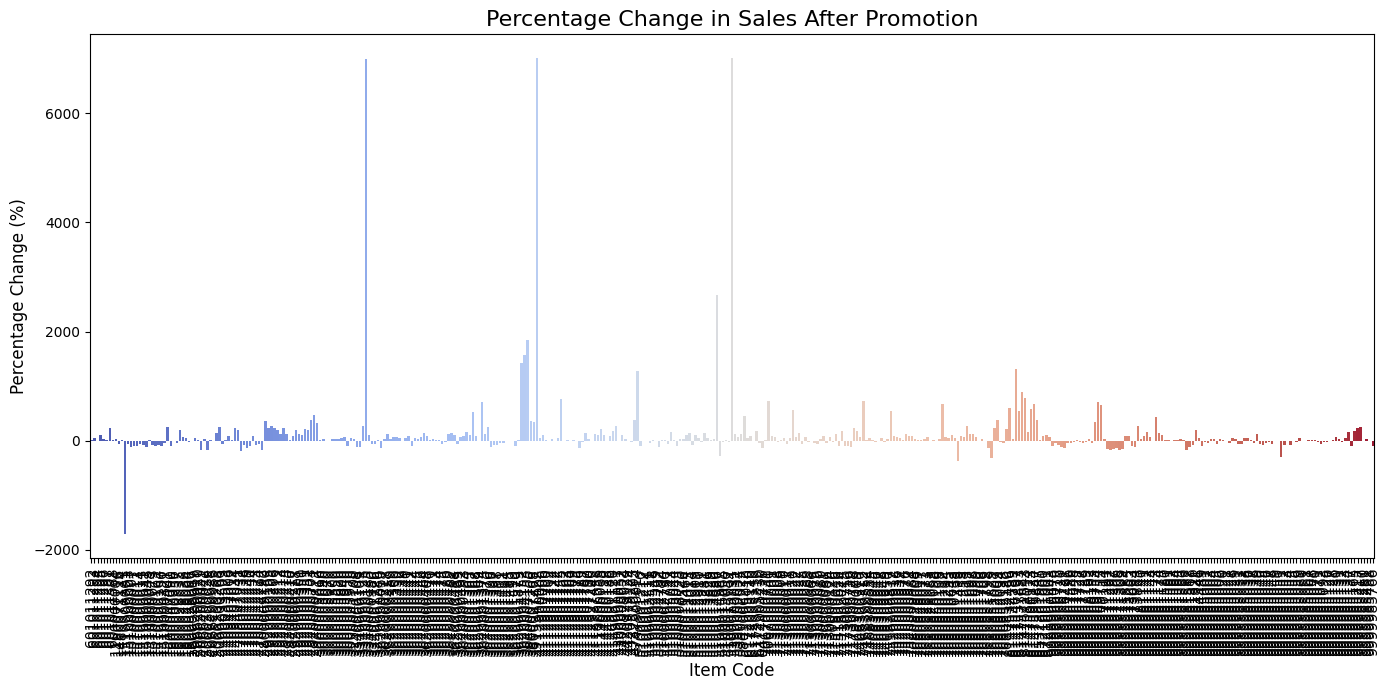

In [131]:
# Set figure size for percentage change plot
plt.figure(figsize=(14, 7))

sns.barplot(data=promo_sales_comparison, x='code', y='percentage_change', palette='coolwarm')

plt.title('Percentage Change in Sales After Promotion', fontsize=16)
plt.xlabel('Item Code', fontsize=12)
plt.ylabel('Percentage Change (%)', fontsize=12)
plt.xticks(rotation=90)

# Show plot
plt.tight_layout()
plt.show()

In [88]:
# Calculate total pre-promotion sales (weeks 1-28)
total_pre_promo_sales = sales_comparison['pre_promo_sales'].sum()

# Calculate total forecasted post-promotion sales (weeks 29-104)
total_post_promo_sales = sales_comparison['post_promo_sales'].sum()

# Calculate overall percentage change
overall_percentage_change = ((total_post_promo_sales - total_pre_promo_sales) / total_pre_promo_sales) * 100


Visualization of overall impact

<ipython-input-89-24486e4c0963>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sales_data, x='Sales Period', y='Total Sales', palette='viridis')


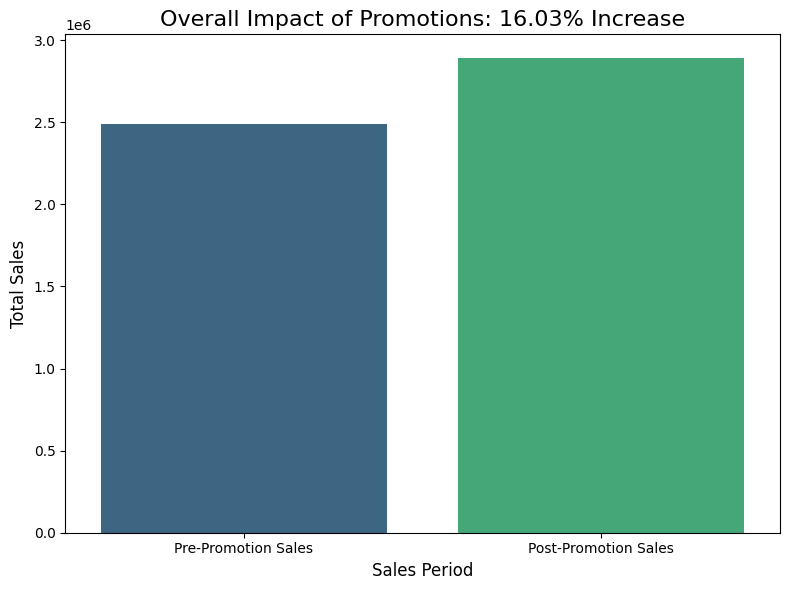

In [89]:
plt.figure(figsize=(8, 6))

sales_data = pd.DataFrame({
    'Sales Period': ['Pre-Promotion Sales', 'Post-Promotion Sales'],
    'Total Sales': [total_pre_promo_sales, total_post_promo_sales]
})

sns.barplot(data=sales_data, x='Sales Period', y='Total Sales', palette='viridis')

# Annotate with percentage change
plt.title(f'Overall Impact of Promotions: {overall_percentage_change:.2f}% {"Increase" if overall_percentage_change > 0 else "Decrease"}', fontsize=16)
plt.ylabel('Total Sales', fontsize=12)
plt.xlabel('Sales Period', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


# Business Solution 02

## Effectiveness of Features and Displays on sales

In [139]:
# Merge promotion_df_normalized with df_feature and df_display to get feature and display types
promotion_with_details = promotion_df_normalized.merge(df_feature, on='feature_id', how='left')
promotion_with_details = promotion_with_details.merge(df_display, on='display_id', how='left')

# Check the merged dataset
print(promotion_with_details.head())


         code  supermarket_No  week  feature_id  display_id  province  \
0  2700042240             285    91           1           1         2   
1  2700042292             285    92           2           2         2   
2  2700042274             285    92           2           2         2   
3  2700042273             285    92           2           2         2   
4  2700042254             285    92           2           2         2   

  promo_date                feature            display  
0 2023-09-30         Not on Feature  Mid-Aisle End Cap  
1 2023-10-07  Interior Page Feature     Not on Display  
2 2023-10-07  Interior Page Feature     Not on Display  
3 2023-10-07  Interior Page Feature     Not on Display  
4 2023-10-07  Interior Page Feature     Not on Display  


In [142]:
# Merge sales_comparison with promotion details to link features and displays
sales_promo_comparison = sales_comparison.merge(promotion_with_details, on='code', how='left')

# Filter only rows where the promotion actually occurred (using 'week' instead of 'promo_week')
sales_promo_comparison = sales_promo_comparison[sales_promo_comparison['week'] > 0]

# Check the merged dataset
print(sales_promo_comparison.head())



        code  pre_promo_sales  post_promo_sales  percentage_change  \
5  601011292          9026.52           9680.07           7.240332   
6  601011292          9026.52           9680.07           7.240332   
7  601011292          9026.52           9680.07           7.240332   
8  601011292          9026.52           9680.07           7.240332   
9  601011292          9026.52           9680.07           7.240332   

   supermarket_No  week  feature_id  display_id  province promo_date  \
5             1.0  49.0         2.0         2.0       1.0 2022-12-10   
6             1.0  83.0         2.0         2.0       1.0 2023-08-05   
7             1.0  98.0         2.0         2.0       1.0 2023-11-18   
8             2.0  49.0         2.0         2.0       1.0 2022-12-10   
9             2.0  83.0         2.0         2.0       1.0 2023-08-05   

                 feature         display  
5  Interior Page Feature  Not on Display  
6  Interior Page Feature  Not on Display  
7  Interior Page 

In [144]:
# Group sales by feature and display types
sales_by_feature = sales_promo_comparison.groupby('feature')[['pre_promo_sales', 'post_promo_sales']].sum().reset_index()
sales_by_display = sales_promo_comparison.groupby('display')[['pre_promo_sales', 'post_promo_sales']].sum().reset_index()

# Calculate percentage increase in sales for features
sales_by_feature['percentage_change'] = ((sales_by_feature['post_promo_sales'] - sales_by_feature['pre_promo_sales']) /
                                         sales_by_feature['pre_promo_sales']) * 100

# Calculate percentage increase in sales for displays
sales_by_display['percentage_change'] = ((sales_by_display['post_promo_sales'] - sales_by_display['pre_promo_sales']) /
                                         sales_by_display['pre_promo_sales']) * 100

# Display results
print(sales_by_feature)
print(sales_by_display)


                   feature  pre_promo_sales  post_promo_sales  \
0        Back Page Feature     3.653155e+07     -9.407193e+04   
1       Front Page Feature     2.340372e+08      3.158709e+08   
2    Interior Page Feature     1.137528e+09      1.361640e+09   
3  Interior Page Line Item     4.988840e+07      8.990663e+07   
4           Not on Feature     6.353129e+08      6.948932e+08   
5        Wrap Back Feature     3.960946e+07      2.879918e+07   
6       Wrap Front Feature     2.355043e+07      4.604070e+05   
7    Wrap Interior Feature     1.275950e+08      1.640571e+08   

   percentage_change  
0        -100.257509  
1          34.966143  
2          19.701612  
3          80.215520  
4           9.378091  
5         -27.292179  
6         -98.045017  
7          28.576472  
                       display  pre_promo_sales  post_promo_sales  \
0                Front End Cap     9.978355e+07      1.093376e+08   
1                     In-Aisle     5.970409e+07      6.422458e+07   


<ipython-input-145-2a419a33b559>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sales_by_feature, x='feature', y='percentage_change', palette='Blues_d')


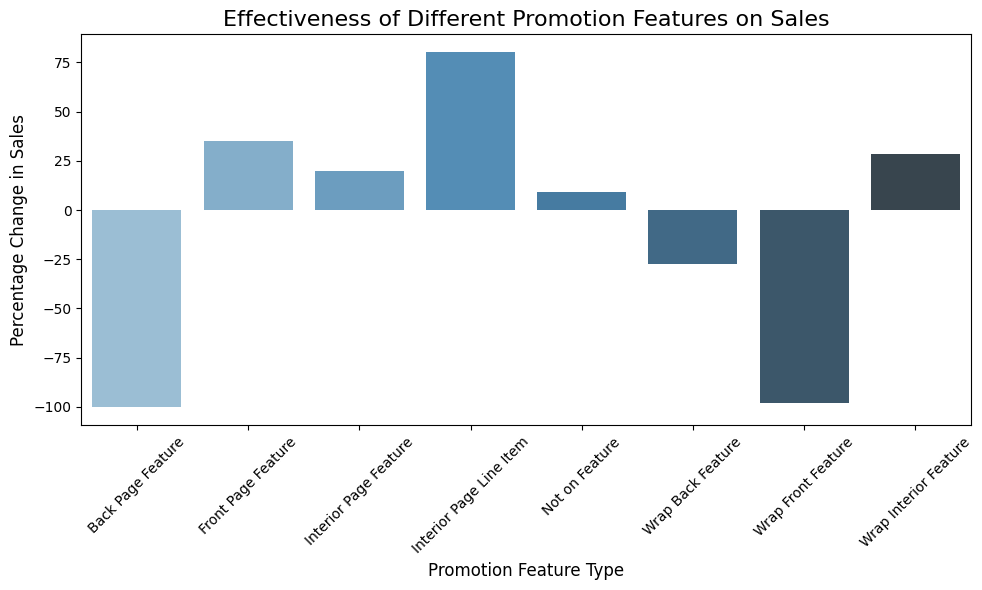

<ipython-input-145-2a419a33b559>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sales_by_display, x='display', y='percentage_change', palette='Greens_d')


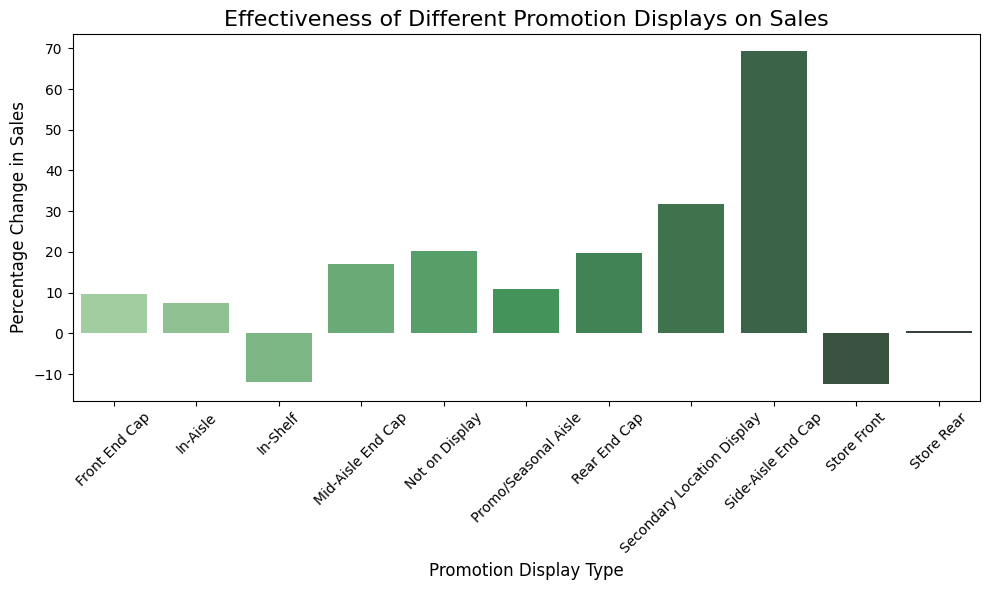

In [145]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualization for Feature Types
plt.figure(figsize=(10, 6))
sns.barplot(data=sales_by_feature, x='feature', y='percentage_change', palette='Blues_d')
plt.title('Effectiveness of Different Promotion Features on Sales', fontsize=16)
plt.ylabel('Percentage Change in Sales', fontsize=12)
plt.xlabel('Promotion Feature Type', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualization for Display Types
plt.figure(figsize=(10, 6))
sns.barplot(data=sales_by_display, x='display', y='percentage_change', palette='Greens_d')
plt.title('Effectiveness of Different Promotion Displays on Sales', fontsize=16)
plt.ylabel('Percentage Change in Sales', fontsize=12)
plt.xlabel('Promotion Display Type', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
